🎬 Deep Collaborative Filtering for Movie Recommendations
📊 Creating synthetic movie dataset...
✅ Generated 47644 ratings for 1000 users and 500 movies

📈 Dataset Statistics:
Number of ratings: 47644
Number of unique users: 1000
Number of unique movies: 500
Rating distribution:
rating
1.00     502
1.05       3
1.10     940
1.15       5
1.20     967
        ... 
4.80    1135
4.85      11
4.90    1131
4.95       3
5.00    2161
Name: count, Length: 163, dtype: int64

📊 Data Split:
Training samples: 30492
Validation samples: 7623
Test samples: 9529

🧠 Model Architecture:
Users: 1000, Movies: 500
Embedding dimension: 64
Hidden layers: [128, 64, 32]
Total parameters: 124,830

🚀 Training model on cuda
--------------------------------------------------


Epoch 1/15: 100%|██████████| 30/30 [00:01<00:00, 20.60it/s]


Epoch 1: Train Loss = 11.5711, Val Loss = 11.4059


Epoch 2/15: 100%|██████████| 30/30 [00:00<00:00, 92.91it/s]


Epoch 2: Train Loss = 10.2985, Val Loss = 9.5756


Epoch 3/15: 100%|██████████| 30/30 [00:00<00:00, 84.48it/s]


Epoch 3: Train Loss = 8.7930, Val Loss = 7.7295


Epoch 4/15: 100%|██████████| 30/30 [00:00<00:00, 62.11it/s]


Epoch 4: Train Loss = 6.9757, Val Loss = 5.7114


Epoch 5/15: 100%|██████████| 30/30 [00:00<00:00, 89.11it/s]


Epoch 5: Train Loss = 5.1367, Val Loss = 3.8156


Epoch 6/15: 100%|██████████| 30/30 [00:00<00:00, 87.41it/s]


Epoch 6: Train Loss = 3.6405, Val Loss = 2.5717


Epoch 7/15: 100%|██████████| 30/30 [00:00<00:00, 89.28it/s]


Epoch 7: Train Loss = 2.6596, Val Loss = 1.8240


Epoch 8/15: 100%|██████████| 30/30 [00:00<00:00, 94.37it/s]


Epoch 8: Train Loss = 2.1650, Val Loss = 1.5162


Epoch 9/15: 100%|██████████| 30/30 [00:00<00:00, 63.21it/s]


Epoch 9: Train Loss = 1.9544, Val Loss = 1.4269


Epoch 10/15: 100%|██████████| 30/30 [00:00<00:00, 92.72it/s]


Epoch 10: Train Loss = 1.8471, Val Loss = 1.3874


Epoch 11/15: 100%|██████████| 30/30 [00:00<00:00, 61.46it/s]


Epoch 11: Train Loss = 1.7449, Val Loss = 1.3803


Epoch 12/15: 100%|██████████| 30/30 [00:00<00:00, 89.49it/s]


Epoch 12: Train Loss = 1.7054, Val Loss = 1.3665


Epoch 13/15: 100%|██████████| 30/30 [00:00<00:00, 92.08it/s]


Epoch 13: Train Loss = 1.7032, Val Loss = 1.3688


Epoch 14/15: 100%|██████████| 30/30 [00:00<00:00, 61.34it/s]


Epoch 14: Train Loss = 1.6348, Val Loss = 1.3687


Epoch 15/15: 100%|██████████| 30/30 [00:00<00:00, 93.23it/s]


Epoch 15: Train Loss = 1.5832, Val Loss = 1.3739

📊 Model Performance:
RMSE: 1.1723
MAE: 1.0024
MSE: 1.3742


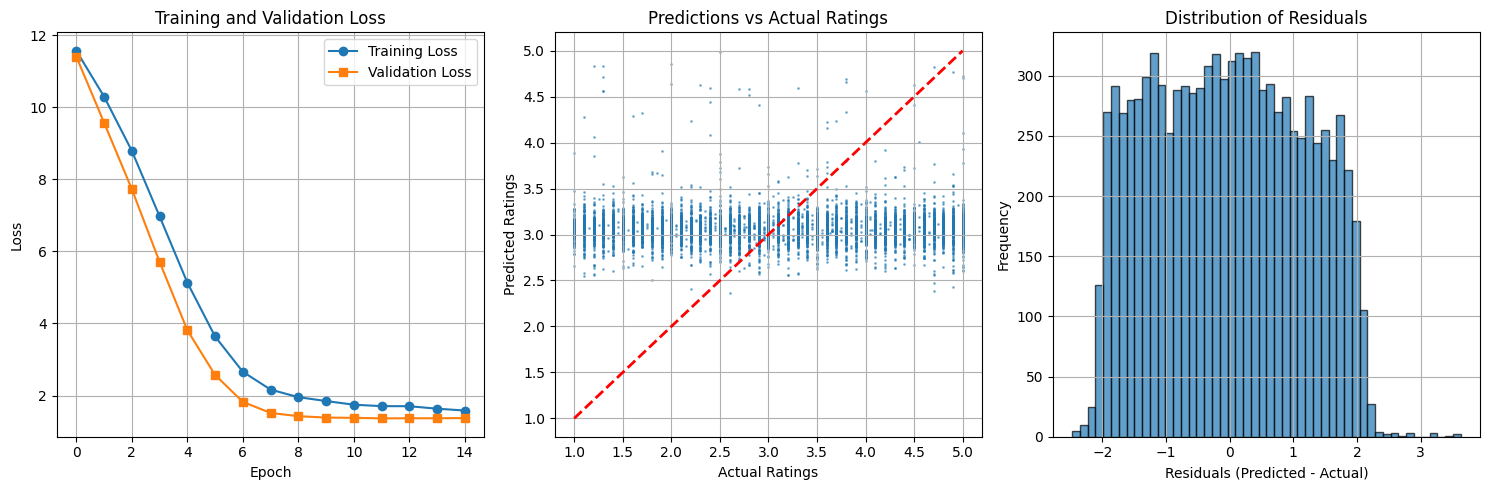


🎬 Top 10 Movie Recommendations for User 0:
--------------------------------------------------
 1. Movie_383 (Sci-Fi) - Predicted Rating: 4.40
 2. Movie_292 (Action) - Predicted Rating: 4.31
 3. Movie_144 (Sci-Fi) - Predicted Rating: 3.63
 4. Movie_359 (Horror) - Predicted Rating: 3.57
 5. Movie_16 (Horror) - Predicted Rating: 3.42
 6. Movie_21 (Comedy) - Predicted Rating: 3.40
 7. Movie_266 (Romance) - Predicted Rating: 3.38
 8. Movie_333 (Romance) - Predicted Rating: 3.37
 9. Movie_367 (Sci-Fi) - Predicted Rating: 3.36
10. Movie_216 (Romance) - Predicted Rating: 3.34

🔍 Embedding Analysis:
User embedding shape: (1000, 64)
Movie embedding shape: (500, 64)


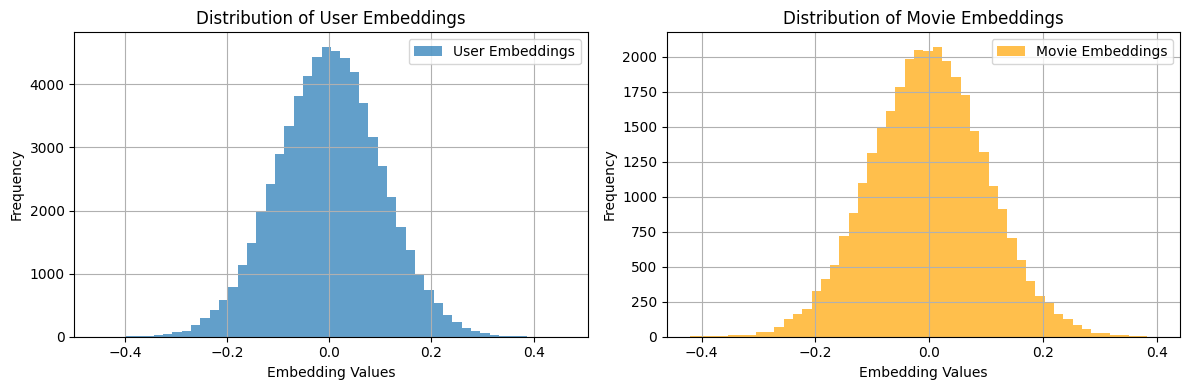


🎯 Movies Similar to 'Movie_50' (Sci-Fi):
------------------------------------------------------------
1. Movie_170 (Sci-Fi) - Similarity: 0.331
2. Movie_324 (Comedy) - Similarity: 0.322
3. Movie_288 (Drama) - Similarity: 0.302
4. Movie_362 (Romance) - Similarity: 0.299
5. Movie_62 (Thriller) - Similarity: 0.271

🎉 Deep Collaborative Filtering Model Training Complete!

📋 Summary:
• Model successfully trained with RMSE: 1.1723
• Generated recommendations for users
• Analyzed learned embeddings
• Implemented similarity-based movie finder

💡 Next Steps:
• Try different embedding dimensions and architectures
• Implement matrix factorization comparison
• Add content-based features (genres, actors, etc.)
• Experiment with different loss functions (ranking losses)
• Add user and item cold-start handling


In [1]:
# Deep Collaborative Filtering for Movie Recommendations
# Comprehensive implementation for Google Colab

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, mean_absolute_error
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import torch.nn.functional as F
from tqdm import tqdm
import warnings
warnings.filterwarnings('ignore')

# Set random seeds for reproducibility
np.random.seed(42)
torch.manual_seed(42)

print("🎬 Deep Collaborative Filtering for Movie Recommendations")
print("=" * 60)

# ================================
# 1. DATA PREPARATION
# ================================

def create_synthetic_movie_data(n_users=1000, n_movies=500, n_ratings=50000):
    """
    Create synthetic movie rating data for demonstration
    In practice, you would load the MovieLens dataset
    """
    print("📊 Creating synthetic movie dataset...")

    # Create movie genres and features
    genres = ['Action', 'Comedy', 'Drama', 'Horror', 'Romance', 'Sci-Fi', 'Thriller']

    # Generate movies with metadata
    movies = []
    for i in range(n_movies):
        movie = {
            'movie_id': i,
            'title': f'Movie_{i}',
            'genre': np.random.choice(genres),
            'year': np.random.randint(1980, 2024),
            'avg_rating': np.random.uniform(1, 5)
        }
        movies.append(movie)

    movies_df = pd.DataFrame(movies)

    # Generate users with preferences
    users = []
    for i in range(n_users):
        user = {
            'user_id': i,
            'age': np.random.randint(18, 70),
            'favorite_genre': np.random.choice(genres)
        }
        users.append(user)

    users_df = pd.DataFrame(users)

    # Generate ratings with some bias based on user preferences
    ratings = []
    for _ in range(n_ratings):
        user_id = np.random.randint(0, n_users)
        movie_id = np.random.randint(0, n_movies)

        # Add bias based on user's favorite genre
        user_fav_genre = users_df.loc[user_id, 'favorite_genre']
        movie_genre = movies_df.loc[movie_id, 'genre']

        base_rating = np.random.uniform(1, 5)
        if user_fav_genre == movie_genre:
            base_rating = min(5.0, base_rating + np.random.uniform(0.5, 1.5))

        rating = {
            'user_id': user_id,
            'movie_id': movie_id,
            'rating': round(base_rating, 1),
            'timestamp': np.random.randint(1000000000, 2000000000)
        }
        ratings.append(rating)

    ratings_df = pd.DataFrame(ratings)
    # Remove duplicates (same user rating same movie multiple times)
    ratings_df = ratings_df.groupby(['user_id', 'movie_id']).agg({
        'rating': 'mean',
        'timestamp': 'last'
    }).reset_index()

    print(f"✅ Generated {len(ratings_df)} ratings for {n_users} users and {n_movies} movies")
    return ratings_df, movies_df, users_df

# Create the dataset
ratings_df, movies_df, users_df = create_synthetic_movie_data()

# Display basic statistics
print("\n📈 Dataset Statistics:")
print(f"Number of ratings: {len(ratings_df)}")
print(f"Number of unique users: {ratings_df['user_id'].nunique()}")
print(f"Number of unique movies: {ratings_df['movie_id'].nunique()}")
print(f"Rating distribution:")
print(ratings_df['rating'].value_counts().sort_index())

# ================================
# 2. NEURAL NETWORK ARCHITECTURE
# ================================

class DeepCollaborativeFiltering(nn.Module):
    """
    Deep Collaborative Filtering Model with Embeddings
    """
    def __init__(self, n_users, n_movies, embedding_dim=50, hidden_dims=[128, 64]):
        super(DeepCollaborativeFiltering, self).__init__()

        # User and Movie Embeddings
        self.user_embedding = nn.Embedding(n_users, embedding_dim)
        self.movie_embedding = nn.Embedding(n_movies, embedding_dim)

        # Bias terms
        self.user_bias = nn.Embedding(n_users, 1)
        self.movie_bias = nn.Embedding(n_movies, 1)
        self.global_bias = nn.Parameter(torch.zeros(1))

        # Deep Neural Network layers
        layers = []
        input_dim = embedding_dim * 2

        for hidden_dim in hidden_dims:
            layers.extend([
                nn.Linear(input_dim, hidden_dim),
                nn.ReLU(),
                nn.Dropout(0.3),
                nn.BatchNorm1d(hidden_dim)
            ])
            input_dim = hidden_dim

        # Output layer
        layers.append(nn.Linear(input_dim, 1))

        self.deep_layers = nn.Sequential(*layers)

        # Initialize embeddings
        nn.init.normal_(self.user_embedding.weight, std=0.1)
        nn.init.normal_(self.movie_embedding.weight, std=0.1)
        nn.init.normal_(self.user_bias.weight, std=0.01)
        nn.init.normal_(self.movie_bias.weight, std=0.01)

    def forward(self, user_ids, movie_ids):
        # Get embeddings
        user_embeds = self.user_embedding(user_ids)
        movie_embeds = self.movie_embedding(movie_ids)

        # Get bias terms
        user_bias = self.user_bias(user_ids).squeeze()
        movie_bias = self.movie_bias(movie_ids).squeeze()

        # Concatenate embeddings for deep network
        concat_embeds = torch.cat([user_embeds, movie_embeds], dim=1)
        deep_output = self.deep_layers(concat_embeds).squeeze()

        # Final prediction: bias terms + deep network output
        prediction = self.global_bias + user_bias + movie_bias + deep_output

        return prediction

# ================================
# 3. DATASET CLASS
# ================================

class MovieRatingDataset(Dataset):
    def __init__(self, ratings_df):
        self.user_ids = torch.LongTensor(ratings_df['user_id'].values)
        self.movie_ids = torch.LongTensor(ratings_df['movie_id'].values)
        self.ratings = torch.FloatTensor(ratings_df['rating'].values)

    def __len__(self):
        return len(self.ratings)

    def __getitem__(self, idx):
        return self.user_ids[idx], self.movie_ids[idx], self.ratings[idx]

# ================================
# 4. TRAINING PIPELINE
# ================================

def train_model(model, train_loader, val_loader, epochs=20, lr=0.001):
    """
    Train the deep collaborative filtering model
    """
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    model = model.to(device)

    optimizer = optim.Adam(model.parameters(), lr=lr, weight_decay=1e-5)
    scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, patience=3, factor=0.5)
    criterion = nn.MSELoss()

    train_losses = []
    val_losses = []

    print(f"\n🚀 Training model on {device}")
    print("-" * 50)

    for epoch in range(epochs):
        # Training phase
        model.train()
        train_loss = 0
        train_batches = 0

        for user_ids, movie_ids, ratings in tqdm(train_loader, desc=f'Epoch {epoch+1}/{epochs}'):
            user_ids, movie_ids, ratings = user_ids.to(device), movie_ids.to(device), ratings.to(device)

            optimizer.zero_grad()
            predictions = model(user_ids, movie_ids)
            loss = criterion(predictions, ratings)
            loss.backward()
            optimizer.step()

            train_loss += loss.item()
            train_batches += 1

        # Validation phase
        model.eval()
        val_loss = 0
        val_batches = 0

        with torch.no_grad():
            for user_ids, movie_ids, ratings in val_loader:
                user_ids, movie_ids, ratings = user_ids.to(device), movie_ids.to(device), ratings.to(device)
                predictions = model(user_ids, movie_ids)
                loss = criterion(predictions, ratings)
                val_loss += loss.item()
                val_batches += 1

        avg_train_loss = train_loss / train_batches
        avg_val_loss = val_loss / val_batches

        train_losses.append(avg_train_loss)
        val_losses.append(avg_val_loss)

        scheduler.step(avg_val_loss)

        print(f'Epoch {epoch+1}: Train Loss = {avg_train_loss:.4f}, Val Loss = {avg_val_loss:.4f}')

    return train_losses, val_losses

# ================================
# 5. PREPARE DATA AND TRAIN
# ================================

# Split the data
train_df, test_df = train_test_split(ratings_df, test_size=0.2, random_state=42)
train_df, val_df = train_test_split(train_df, test_size=0.2, random_state=42)

print(f"\n📊 Data Split:")
print(f"Training samples: {len(train_df)}")
print(f"Validation samples: {len(val_df)}")
print(f"Test samples: {len(test_df)}")

# Create datasets and dataloaders
train_dataset = MovieRatingDataset(train_df)
val_dataset = MovieRatingDataset(val_df)
test_dataset = MovieRatingDataset(test_df)

batch_size = 1024
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# Initialize model
n_users = ratings_df['user_id'].nunique()
n_movies = ratings_df['movie_id'].nunique()

model = DeepCollaborativeFiltering(
    n_users=n_users,
    n_movies=n_movies,
    embedding_dim=64,
    hidden_dims=[128, 64, 32]
)

print(f"\n🧠 Model Architecture:")
print(f"Users: {n_users}, Movies: {n_movies}")
print(f"Embedding dimension: 64")
print(f"Hidden layers: [128, 64, 32]")
print(f"Total parameters: {sum(p.numel() for p in model.parameters()):,}")

# Train the model
train_losses, val_losses = train_model(model, train_loader, val_loader, epochs=15)

# ================================
# 6. EVALUATION AND VISUALIZATION
# ================================

def evaluate_model(model, test_loader):
    """
    Evaluate model performance on test set
    """
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    model.eval()

    predictions = []
    actuals = []

    with torch.no_grad():
        for user_ids, movie_ids, ratings in test_loader:
            user_ids, movie_ids, ratings = user_ids.to(device), movie_ids.to(device), ratings.to(device)
            preds = model(user_ids, movie_ids)
            predictions.extend(preds.cpu().numpy())
            actuals.extend(ratings.cpu().numpy())

    predictions = np.array(predictions)
    actuals = np.array(actuals)

    mse = mean_squared_error(actuals, predictions)
    mae = mean_absolute_error(actuals, predictions)
    rmse = np.sqrt(mse)

    return predictions, actuals, mse, mae, rmse

# Evaluate the model
predictions, actuals, mse, mae, rmse = evaluate_model(model, test_loader)

print(f"\n📊 Model Performance:")
print(f"RMSE: {rmse:.4f}")
print(f"MAE: {mae:.4f}")
print(f"MSE: {mse:.4f}")

# Plot training curves
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.plot(train_losses, label='Training Loss', marker='o')
plt.plot(val_losses, label='Validation Loss', marker='s')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

# Plot predictions vs actual
plt.subplot(1, 3, 2)
plt.scatter(actuals, predictions, alpha=0.5, s=1)
plt.plot([1, 5], [1, 5], 'r--', lw=2)
plt.xlabel('Actual Ratings')
plt.ylabel('Predicted Ratings')
plt.title('Predictions vs Actual Ratings')
plt.grid(True)

# Plot residuals
plt.subplot(1, 3, 3)
residuals = predictions - actuals
plt.hist(residuals, bins=50, alpha=0.7, edgecolor='black')
plt.xlabel('Residuals (Predicted - Actual)')
plt.ylabel('Frequency')
plt.title('Distribution of Residuals')
plt.grid(True)

plt.tight_layout()
plt.show()

# ================================
# 7. RECOMMENDATION SYSTEM
# ================================

def get_user_recommendations(model, user_id, n_recommendations=10, ratings_df=None):
    """
    Get movie recommendations for a specific user
    """
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    model.eval()

    # Get all movies the user hasn't rated
    user_movies = set(ratings_df[ratings_df['user_id'] == user_id]['movie_id'].values)
    all_movies = set(range(n_movies))
    unrated_movies = list(all_movies - user_movies)

    if not unrated_movies:
        return []

    # Predict ratings for all unrated movies
    user_ids = torch.LongTensor([user_id] * len(unrated_movies)).to(device)
    movie_ids = torch.LongTensor(unrated_movies).to(device)

    with torch.no_grad():
        predictions = model(user_ids, movie_ids).cpu().numpy()

    # Get top recommendations
    movie_predictions = list(zip(unrated_movies, predictions))
    movie_predictions.sort(key=lambda x: x[1], reverse=True)

    return movie_predictions[:n_recommendations]

# Example recommendations
example_user_id = 0
recommendations = get_user_recommendations(model, example_user_id, n_recommendations=10, ratings_df=ratings_df)

print(f"\n🎬 Top 10 Movie Recommendations for User {example_user_id}:")
print("-" * 50)
for i, (movie_id, predicted_rating) in enumerate(recommendations, 1):
    movie_info = movies_df[movies_df['movie_id'] == movie_id].iloc[0]
    print(f"{i:2d}. {movie_info['title']} ({movie_info['genre']}) - Predicted Rating: {predicted_rating:.2f}")

# ================================
# 8. EMBEDDING ANALYSIS
# ================================

def analyze_embeddings(model):
    """
    Analyze learned user and movie embeddings
    """
    # Get embeddings
    user_embeddings = model.user_embedding.weight.detach().cpu().numpy()
    movie_embeddings = model.movie_embedding.weight.detach().cpu().numpy()

    print(f"\n🔍 Embedding Analysis:")
    print(f"User embedding shape: {user_embeddings.shape}")
    print(f"Movie embedding shape: {movie_embeddings.shape}")

    # Plot embedding distributions
    plt.figure(figsize=(12, 4))

    plt.subplot(1, 2, 1)
    plt.hist(user_embeddings.flatten(), bins=50, alpha=0.7, label='User Embeddings')
    plt.xlabel('Embedding Values')
    plt.ylabel('Frequency')
    plt.title('Distribution of User Embeddings')
    plt.legend()
    plt.grid(True)

    plt.subplot(1, 2, 2)
    plt.hist(movie_embeddings.flatten(), bins=50, alpha=0.7, label='Movie Embeddings', color='orange')
    plt.xlabel('Embedding Values')
    plt.ylabel('Frequency')
    plt.title('Distribution of Movie Embeddings')
    plt.legend()
    plt.grid(True)

    plt.tight_layout()
    plt.show()

analyze_embeddings(model)

# ================================
# 9. SIMILAR MOVIES FINDER
# ================================

def find_similar_movies(model, movie_id, n_similar=5):
    """
    Find movies similar to a given movie using embedding cosine similarity
    """
    movie_embeddings = model.movie_embedding.weight.detach().cpu().numpy()

    # Get target movie embedding
    target_embedding = movie_embeddings[movie_id]

    # Calculate cosine similarity with all movies
    similarities = []
    for i, embedding in enumerate(movie_embeddings):
        if i != movie_id:
            similarity = np.dot(target_embedding, embedding) / (
                np.linalg.norm(target_embedding) * np.linalg.norm(embedding)
            )
            similarities.append((i, similarity))

    # Sort by similarity
    similarities.sort(key=lambda x: x[1], reverse=True)

    return similarities[:n_similar]

# Example: Find similar movies
example_movie_id = 50
similar_movies = find_similar_movies(model, example_movie_id, n_similar=5)

target_movie = movies_df[movies_df['movie_id'] == example_movie_id].iloc[0]
print(f"\n🎯 Movies Similar to '{target_movie['title']}' ({target_movie['genre']}):")
print("-" * 60)

for i, (movie_id, similarity) in enumerate(similar_movies, 1):
    movie_info = movies_df[movies_df['movie_id'] == movie_id].iloc[0]
    print(f"{i}. {movie_info['title']} ({movie_info['genre']}) - Similarity: {similarity:.3f}")

print("\n" + "="*60)
print("🎉 Deep Collaborative Filtering Model Training Complete!")
print("="*60)
print("\n📋 Summary:")
print(f"• Model successfully trained with RMSE: {rmse:.4f}")
print(f"• Generated recommendations for users")
print(f"• Analyzed learned embeddings")
print(f"• Implemented similarity-based movie finder")
print("\n💡 Next Steps:")
print("• Try different embedding dimensions and architectures")
print("• Implement matrix factorization comparison")
print("• Add content-based features (genres, actors, etc.)")
print("• Experiment with different loss functions (ranking losses)")
print("• Add user and item cold-start handling")